# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [64]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
con = sqlite3.connect("pokemon-tcg-database.sqlite3")


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [4]:
#My main focuses here are going to be the energy_card and trainer_Card as the pokemon_Card table will need to be built/joined 
#during the manipulation stage of analsys. I start here with reminding myself of the energy_card info.
energy_card = pd.read_csv('data\energy_card.txt', delimiter='\t')
energy_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_energy_card                 293 non-null    int64  
 1   card_number                    293 non-null    int64  
 2   card_number_special            0 non-null      float64
 3   id_rarity                      293 non-null    int64  
 4   id_energy                      293 non-null    int64  
 5   id_energy_special              157 non-null    float64
 6   id_set                         293 non-null    int64  
 7   id_extended_attributes_lookup  3 non-null      float64
 8   artist                         293 non-null    int64  
 9   text                           156 non-null    object 
 10  additionalRule1                2 non-null      object 
 11  Holofoil                       23 non-null     float64
 12  Promo                          0 non-null      flo

In [5]:
for col in energy_card.columns:
    pct_missing = np.mean(energy_card[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
#I then wanted to find the percentage of null values as the energy_Card table has a significant amount

id_energy_card - 0%
card_number - 0%
card_number_special - 100%
id_rarity - 0%
id_energy - 0%
id_energy_special - 46%
id_set - 0%
id_extended_attributes_lookup - 99%
artist - 0%
text - 47%
additionalRule1 - 99%
Holofoil - 92%
Promo - 100%
Fixed - 100%
Shining - 100%
Secret Count - 93%
Series Crossover - 100%
special_pokemon_types - 99%
Full Art - 100%
Gold Star - 100%
Regular Art - 100%
special_pokemon - 100%
Prism - 99%


In [8]:
#with the information above, I removed all columns that had 100% null values
energy_card.dropna(axis = 1, how = 'all', inplace = True)
energy_card.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_energy_card                 293 non-null    int64  
 1   card_number                    293 non-null    int64  
 2   id_rarity                      293 non-null    int64  
 3   id_energy                      293 non-null    int64  
 4   id_energy_special              157 non-null    float64
 5   id_set                         293 non-null    int64  
 6   id_extended_attributes_lookup  3 non-null      float64
 7   artist                         293 non-null    int64  
 8   text                           156 non-null    object 
 9   additionalRule1                2 non-null      object 
 10  Holofoil                       23 non-null     float64
 11  Secret Count                   20 non-null     float64
 12  special_pokemon_types          2 non-null      flo

In [27]:
#I then removed the columns that had 2 or 3 values and the rest null
energy_card.drop(['id_extended_attributes_lookup', 'additionalRule1', 'special_pokemon_types', 'Prism'], axis = 1, inplace = True)

In [31]:
energy_card.drop(['Holofoil', 'Secret Count'], axis = 1, inplace = True)
energy_card
#I originally wasn't going to remove these two columns, but when I checked the table, there was just too many null values
#that it made it difficult to read and analyze the other values. I decided to remove them.

,id_energy_card,card_number,id_rarity,id_energy,id_energy_special,id_set,artist,text
0,1,96,2,10,1.0,1,3,Provides energy. Doesn't count as a basic ener...
1,2,97,1,1,NaN,1,3,NaN
2,3,98,1,2,NaN,1,3,NaN
3,4,99,1,3,NaN,1,3,NaN
4,5,100,1,4,NaN,1,3,NaN
...,...,...,...,...,...,...,...,...
288,289,173,2,12,64.0,107,63,"As long as this card is attached to a Pokémon,..."
289,290,174,2,12,65.0,107,63,As long as this card is attached to a Pokémon ...
290,291,174,2,12,66.0,108,63,"As long as this card is attached to a Pokémon,..."
291,292,175,2,12,67.0,108,63,"As long as this card is attached to a Pokémon,..."


In [56]:
#I again reminded myself of the trainer_card info
trainer_card = pd.read_csv('data/trainer_card.txt', delimiter='\t')
trainer_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_trainer_card          1529 non-null   int64  
 1   card_name                1529 non-null   object 
 2   card_number              1529 non-null   int64  
 3   card_number_special      18 non-null     object 
 4   id_rarity                1529 non-null   int64  
 5   id_trainer_type          1529 non-null   int64  
 6   id_trainer_category      1529 non-null   int64  
 7   id_set                   1529 non-null   int64  
 8   card_text                1525 non-null   object 
 9   id_artist                1529 non-null   int64  
 10  id_attack                13 non-null     float64
 11  id_action                20 non-null     float64
 12  hp                       32 non-null     float64
 13  card_rule_1              1098 non-null   float64
 14  ace_spec_rule_1         

In [57]:
for col in trainer_card.columns:
    pct_missing = np.mean(trainer_card[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
#I found the percentage of null values per column for the trainer_Card

id_trainer_card - 0%
card_name - 0%
card_number - 0%
card_number_special - 99%
id_rarity - 0%
id_trainer_type - 0%
id_trainer_category - 0%
id_set - 0%
card_text - 0%
id_artist - 0%
id_attack - 99%
id_action - 99%
hp - 98%
card_rule_1 - 28%
ace_spec_rule_1 - 99%
tool_rule_1 - 91%
prism_rule_1 - 99%
holofoil - 97%
promo - 100%
fixed - 100%
shining - 100%
secret - 94%
series_crossover - 100%
id_special_pokemon_type - 98%
full_art - 86%
gold_art - 100%
regular_art - 100%
id_special_pokemon - 100%


In [58]:
#I removed all columns that had 100% null values
trainer_card.dropna(axis = 1, how = 'all', inplace = True)
trainer_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_trainer_card          1529 non-null   int64  
 1   card_name                1529 non-null   object 
 2   card_number              1529 non-null   int64  
 3   card_number_special      18 non-null     object 
 4   id_rarity                1529 non-null   int64  
 5   id_trainer_type          1529 non-null   int64  
 6   id_trainer_category      1529 non-null   int64  
 7   id_set                   1529 non-null   int64  
 8   card_text                1525 non-null   object 
 9   id_artist                1529 non-null   int64  
 10  id_attack                13 non-null     float64
 11  id_action                20 non-null     float64
 12  hp                       32 non-null     float64
 13  card_rule_1              1098 non-null   float64
 14  ace_spec_rule_1         

In [59]:
# I additional decided to remove the columns below as they still had above 90% null values which was not enough data to make those
#column significantly helpful
trainer_card.drop(['card_number_special', 'id_attack', 'prism_rule_1', 'ace_spec_rule_1'], axis = 1, inplace = True)
trainer_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_trainer_card          1529 non-null   int64  
 1   card_name                1529 non-null   object 
 2   card_number              1529 non-null   int64  
 3   id_rarity                1529 non-null   int64  
 4   id_trainer_type          1529 non-null   int64  
 5   id_trainer_category      1529 non-null   int64  
 6   id_set                   1529 non-null   int64  
 7   card_text                1525 non-null   object 
 8   id_artist                1529 non-null   int64  
 9   id_action                20 non-null     float64
 10  hp                       32 non-null     float64
 11  card_rule_1              1098 non-null   float64
 12  tool_rule_1              142 non-null    float64
 13  holofoil                 52 non-null     float64
 14  secret                  

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

array([[<AxesSubplot:title={'center':'id_energy_card'}>,
        <AxesSubplot:title={'center':'card_number'}>,
        <AxesSubplot:title={'center':'id_rarity'}>],
       [<AxesSubplot:title={'center':'id_energy'}>,
        <AxesSubplot:title={'center':'id_energy_special'}>,
        <AxesSubplot:title={'center':'id_set'}>],
       [<AxesSubplot:title={'center':'artist'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

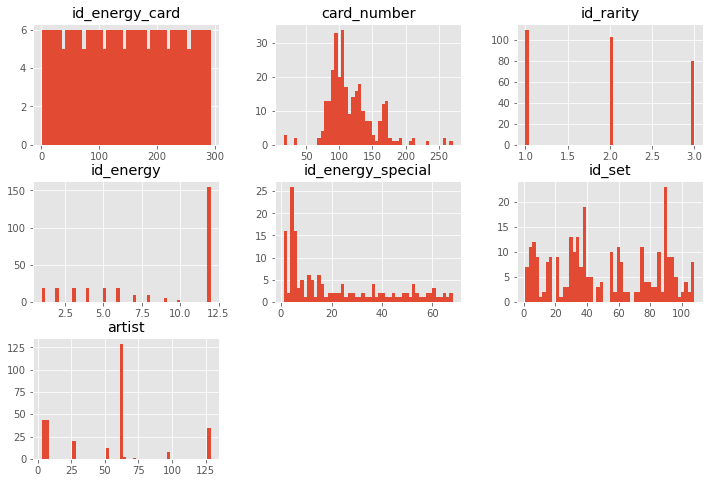

In [65]:
#I knew that there would be outliers in my data. The sheer amount of data and the way that it is organized was bound to produce
#outliers. Additionally, the outliers are going to be necessary as there are pokemon_cards that are particularly unique
#and therefore their data will differ from the others. I need that information to stay, at least for now.
#I did not do anything to remove irregular data at this point, but I did do some visuals below to help me understand the 
#outliers a little better
energy_card.hist(bins=50)

In [61]:
energy_card.describe()

,id_energy_card,card_number,id_rarity,id_energy,id_energy_special,id_set,artist
count,293.000000,293.000000,293.000000,293.000000,157.000000,293.000000,293.000000
mean,147.000000,117.529010,1.897611,8.372014,21.579618,51.638225,51.494881
std,84.726029,35.367881,0.800103,4.178570,20.235196,32.101277,38.783701
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,74.000000,94.000000,1.000000,4.000000,5.000000,28.000000,7.000000
50%,147.000000,108.000000,2.000000,12.000000,13.000000,43.000000,63.000000
75%,220.000000,133.000000,3.000000,12.000000,37.000000,85.000000,63.000000
max,293.000000,271.000000,3.000000,12.000000,68.000000,108.000000,129.000000


<AxesSubplot:>

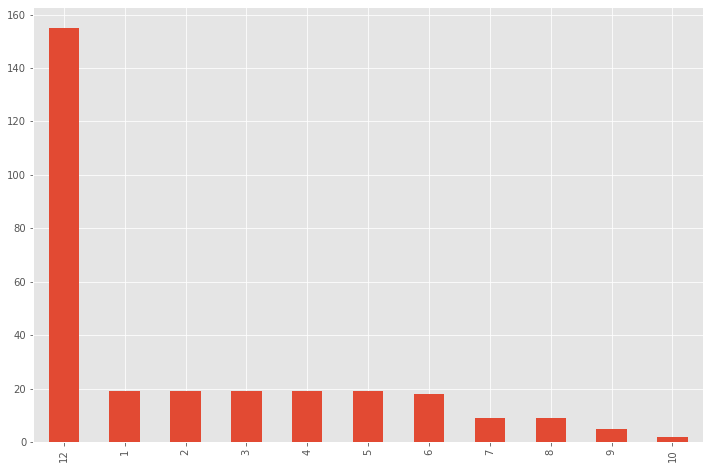

In [70]:
energy_card['id_energy'].value_counts().plot.bar()

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [73]:
#For the purposes of my particular use of this data, I do not need to know the artist. I will be removing this column from
# energy_card as it is not neccessary for me.
artist = pd.read_csv('data/artist.txt', delimiter='\t')
artist.head

<bound method NDFrame.head of      id_artist               name
0            1       Ken Sugimori
1            2    Mitsuhiro Arita
2            3    Keiji Kinebuchi
3            4    Tomoaki Imakuni
4            5    Kagemaru Himeno
..         ...                ...
207        208           MPC Film
208        209         Framestore
209        210          NC Empire
210        211  PLANETA Mochizuki
211        212       Tika Matsuno

[212 rows x 2 columns]>

In [76]:
energy_card.drop(['artist'], axis=1, inplace=True)
energy_card

,id_energy_card,card_number,id_rarity,id_energy,id_energy_special,id_set,text
0,1,96,2,10,1.0,1,Provides energy. Doesn't count as a basic ener...
1,2,97,1,1,NaN,1,NaN
2,3,98,1,2,NaN,1,NaN
3,4,99,1,3,NaN,1,NaN
4,5,100,1,4,NaN,1,NaN
...,...,...,...,...,...,...,...
288,289,173,2,12,64.0,107,"As long as this card is attached to a Pokémon,..."
289,290,174,2,12,65.0,107,As long as this card is attached to a Pokémon ...
290,291,174,2,12,66.0,108,"As long as this card is attached to a Pokémon,..."
291,292,175,2,12,67.0,108,"As long as this card is attached to a Pokémon,..."


In [79]:
trainer_card.head()

,id_trainer_card,card_name,card_number,id_rarity,id_trainer_type,id_trainer_category,id_set,card_text,id_artist,id_action,hp,card_rule_1,tool_rule_1,holofoil,secret,id_special_pokemon_type,full_art
0,1,Clefairy Doll,70,3,114,1,1,Play Clefairy Doll as if it were a Basic Pokém...,3,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Computer Search,71,3,119,1,1,Discard 2 other cards from your hand in order ...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Devolution Spray,72,3,154,1,1,Choose 1 of your own Pokémon in play and a Sta...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Imposter Professor Oak,73,3,333,1,1,Your opponent shuffles his or her hand into hi...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Item Finder,74,3,341,1,1,Discard 2 other cards from your hand in order ...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#Again, I don't need to know the artist for my use of this data, so I am going to remove id_artist and full_art from the
#trainer_card
trainer_card.drop(['id_artist', 'full_art'], axis=1, inplace=True)
trainer_card.head()

,id_trainer_card,card_name,card_number,id_rarity,id_trainer_type,id_trainer_category,id_set,card_text,id_action,hp,card_rule_1,tool_rule_1,holofoil,secret,id_special_pokemon_type
0,1,Clefairy Doll,70,3,114,1,1,Play Clefairy Doll as if it were a Basic Pokém...,NaN,10.0,NaN,NaN,NaN,NaN,NaN
1,2,Computer Search,71,3,119,1,1,Discard 2 other cards from your hand in order ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Devolution Spray,72,3,154,1,1,Choose 1 of your own Pokémon in play and a Sta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Imposter Professor Oak,73,3,333,1,1,Your opponent shuffles his or her hand into hi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Item Finder,74,3,341,1,1,Discard 2 other cards from your hand in order ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
#checking for duplicated values
pokedex = pd.read_csv('data\pokedex.txt', delimiter='\t')

pokedex.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
949    False
950    False
951    False
952    False
953    False
Length: 954, dtype: bool

In [83]:
pokedex.duplicated().sum()
#As far as the data goes, this is the main table I wanted to make sure did not have any duplicates. Other tables include in this
#dataset are going to have duplicates as much of the data is information provided on the cards which some Pokemon
#have similar or possibly the same information.

0

In [ ]:
#I am going to stop here, at least for now, with cleaning up 'Unneccessary' data as I don't want to eliminate too much information. 
#I will need to join tables in order to create the pokemon_card table and I do not want to eliminate too much information
#to then find that I don't have what I need.

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [85]:
#The only inconsistent data I found was in the action table for the action names. There are some of these names in brackets.
#I did some research and it appears that those particular actions that are in brackets are grouped together. As the action
#names are listed in alphabetical order, the brackets allow for those particular action names to be grouped in their own part 
#of the column. I will not be doing anything here to change this as it is important that they are grouped. At this time, in
#my exploration, I have not found any other inconsistencies to note for my particular purposes.
action = pd.read_csv('data\Action.txt', delimiter='\t')
action.head(50)

,id_action,id_action_type,name,text
0,1,1,[Bear],"Once during your turn (before your attack), yo..."
1,2,1,[Chase],"As long as Unown C is your Active Pokémon, whe..."
2,3,1,[Engage],"When you play Unown E from your hand, your opp..."
3,4,1,[Find],"Once during your turn (before you attack), if ..."
4,5,1,[Give],"Once during your turn (before your attack), if..."
5,6,1,[Help],"Once during your turn (before your attack), if..."
6,7,1,[Keep],"Your opponent's attacks, Pokémon Powers, and T..."
7,8,1,[Laugh],"Once during your turn (before your attack), yo..."
8,9,1,[Quicken],"Once during your turn (before your attack), yo..."
9,10,1,[Search],"Once during your turn (before your attack), yo..."


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? 
    -I did find all four types of dirty data in my dataset. My dataset needed a lot of cleaning. It is a large set of data and 
    provides a lot of information that was either not needed or was missing. I cleaned up conservatively here knowing I may 
    need to return later to do some additional cleaning when I go to create the pokemon card table.
2. Did the process of cleaning your data give you new insights into your dataset?
    -It actually helped a lot more than the EDA. I was able to analyze my data a bit more and determine what I needed and did not need. Also, my son provided me with a pokemon card, trainer card, and energy card so that I could determine which information was neccessary for my purposes. He also provided with a pokemon handbook that gave me more insight as to what the data is describing here.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
    -There were several columns in the energy_card and trainer_card tables that I left even though they were missing significant data. I have a slight feeling that I may need those columns when it comes to joining my tables to create the pokemon_card table. I'm making note of this because I may also find out that those particular columns/data points are missing too much that they just need to be removed in order to get to the core of my data.